# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2021-04-07
    Modified:


# Prepare python environment

In [3]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [8]:
name = 'cloud_retrieval'
vv = 'v1'
fp = getpath(name)


Return path named:  cloud_retrieval /data/sam/cloud_retrieval/


# Load Model files for SEAC4RS

In [9]:
lut = sio.idl.readsav(getpath('SEAC4RS')+'model/sp_v5_20130913_raw.out')

Return path named:  SEAC4RS /data/sam/SEAC4RS/


In [12]:
lut.keys()

['tau',
 'ab',
 'pw',
 'sp_irrdn',
 'sp',
 'sp_irrup',
 'sza',
 'zout',
 'wvl',
 'z',
 'ref']

In [19]:
sea_lut = Sp.Sp(lut,irrad=True)

1302 1302
in sp
(2, 1302, 2, 35, 22)
in irrad
(2, 1302, 2, 35, 22)


In [24]:
sea_lut['sp'].shape, sea_lut['sp_irrdn'].shape

((2, 1302, 2, 35, 22), (2, 1302, 2, 35, 22))

In [26]:
# switch out the radiance for the downwelling irradiance
sea_lut.sp = sea_lut['sp_irrdn']

## Calculate the params 

In [27]:
sea_lut.params()

Running Parameters


Sp_parameters.py:605: UserWarning: Copyig the parameters calculated for Ice LUT to the liquid LUT, liquid parameters will be lost
  warnings.warn('Copyig the parameters calculated for liquid LUT to the ice LUT, ice parameters will be lost')


In [28]:
sea_lut.param_hires()

Running parameter hires
(103,)
(59,)
Running interpolation on params: [########################################]100% -- Done! 


## Plot out the lut

In [29]:
lut['sza']

21.0

In [76]:
sea_lut['par'][0,10,20,:],sea_lut['par'][1,10,20,:]

(array([ 1.87726256e+00, -5.33254399e+00,  2.59625779e-02,  9.82849276e-01,
         1.09185846e-01,  5.26304906e-03,  2.59945506e-01, -1.76681768e-01,
        -4.43718594e-02, -1.62450254e-02, -2.22004547e+00,  2.56323355e-01,
         1.19118803e+00,  1.73589919e+00,  3.00000000e-03,  3.18918371e-01]),
 array([ 1.87726256e+00, -5.33254399e+00,  2.59625779e-02,  9.82849276e-01,
         1.09185846e-01,  5.26304906e-03,  2.59945506e-01, -1.76681768e-01,
        -4.43718594e-02, -1.62450254e-02, -2.22004547e+00,  2.56323355e-01,
         1.19118803e+00,  1.73589919e+00,  3.00000000e-03,  3.18918371e-01]))

<IPython.core.display.Javascript object>


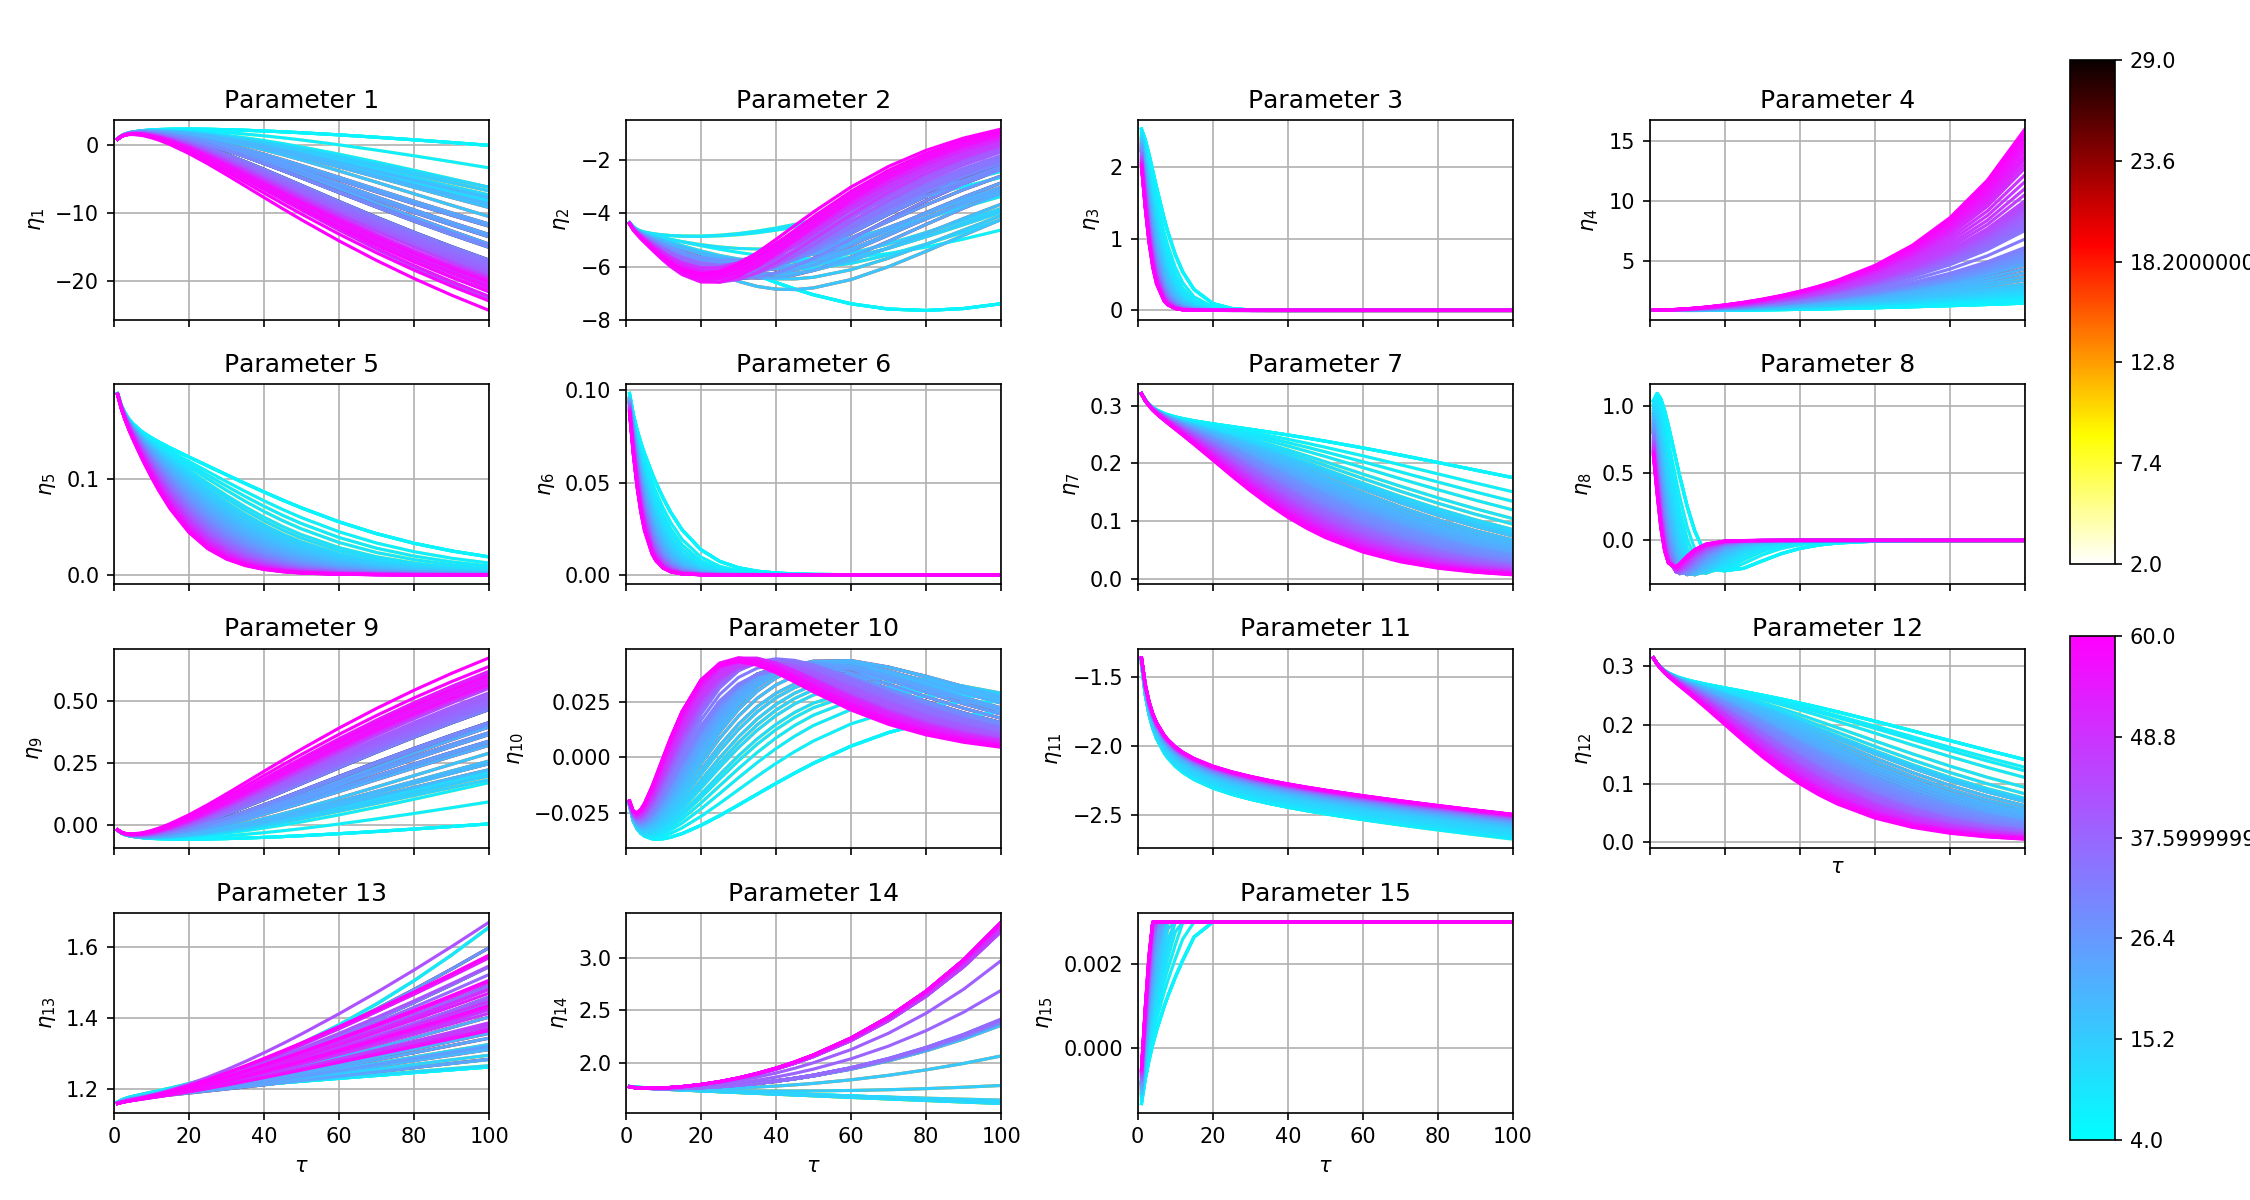

/home/sam/.local/lib/python2.7/site-packages/mpltools/color.py:217: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(color_cycle)


In [30]:
figl,axl = Sp.plot_lut_vs_tau(sea_lut)

# Load the NAAMES models

In [41]:
lutb = hs.loadmat('/data/sam/NAAMES/lut/v2_NAAMES_lut.mat')

In [42]:
lutb.keys()

[u'tau',
 u'rad',
 u'sza',
 u'irr_dn_diff',
 u'irr_dn',
 u'zout',
 u'wvl',
 u'phase',
 u'ref',
 u'irr_up']

In [51]:
lutb['rad'].shape

(2, 1302, 3, 34, 29, 15)

In [77]:
lutn = []
for s in xrange(len(lutb['sza'])):
    sptemp = {}
    sptemp['tau'] = lutb['tau']
    sptemp['ref'] = lutb['ref']
    sptemp['zout'] = lutb['zout']
    sptemp['sza'] = lutb['sza']
    sptemp['phase'] = lutb['phase']
    sptemp['irr_dn_diff'] = lutb['irr_dn_diff'][:,:,:,:,:,s]
    sptemp['irr_dn'] = lutb['irr_dn'][:,:,:,:,:,s]
    sptemp['irr_up'] = lutb['irr_up'][:,:,:,:,:,s]
    sptemp['wvl'] = lutb['wvl']
    sptemp['rad'] = lutb['irr_dn'][:,:,:,:,:,s] #switch out for irradiance
    ltemp = Sp.Sp(sptemp,verbose=False)

    ltemp.params(ice_only=False)
    ltemp.param_hires()
    lutn.append(ltemp)

Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running interpolation on params: [########################################]100% -- Done! 
Running in

In [66]:
lutb['sza']

array([18., 37., 46., 53., 57., 61., 64., 66., 68., 69., 71., 72., 73.,
       74., 75.])

## plot the lut

In [88]:
lutb['rad'][0,500,0,10,10,5],lutb['rad'][1,500,0,10,10,5]

(46.75198364, 45.61227798)

In [71]:
lutn[5].par[0,10,20,:]

array([ 4.35465654e-01, -5.67151736e+00,  3.51422443e+00,  9.50135078e-01,
        1.85111448e-01,  6.57154732e-02,  3.35592346e-01,  1.71020872e+00,
       -8.88098661e-03, -2.29965695e-02, -1.39037917e+00,  3.26835454e-01,
        1.19350005e+00,  1.64781617e+00,  3.00000000e-03,  2.90929302e+02])

In [72]:
lutn[5].par[1,10,20,:]

array([ 4.35465654e-01, -5.67151736e+00,  3.51422443e+00,  9.50135078e-01,
        1.85111448e-01,  6.57154732e-02,  3.35592346e-01,  1.71020872e+00,
       -8.88098661e-03, -2.29965695e-02, -1.39037917e+00,  3.26835454e-01,
        1.19350005e+00,  1.64781617e+00,  3.00000000e-03,  2.90929302e+02])

<IPython.core.display.Javascript object>


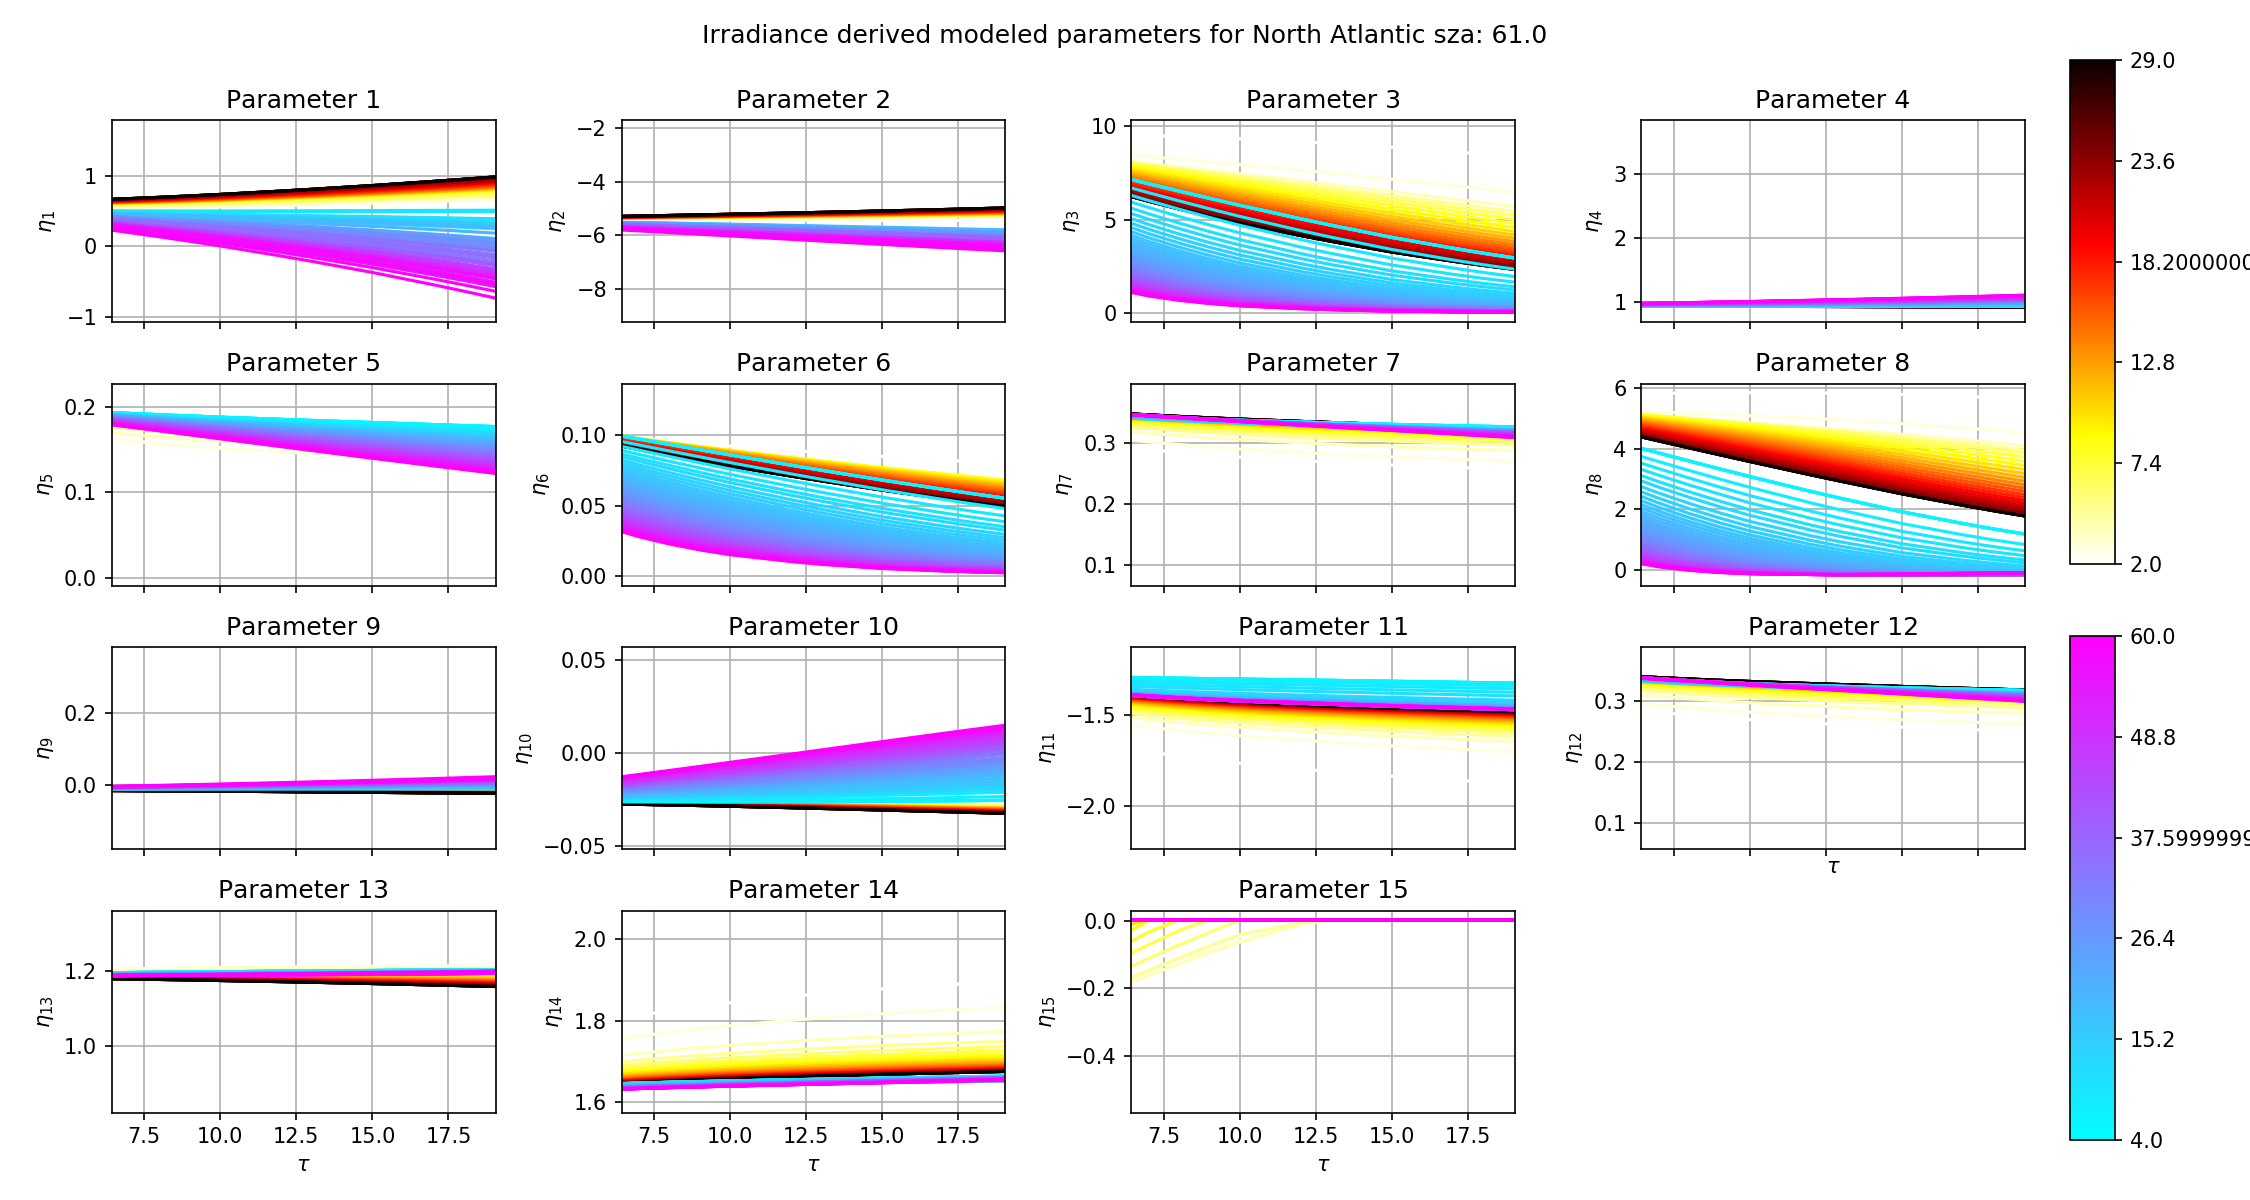

In [94]:
# for sza at 61deg
figl,axl = Sp.plot_lut_vs_tau(lutn[5],forceliq=False,forceice=False)
plt.suptitle('Irradiance derived modeled parameters for North Atlantic sza: {}'.format(lutb['sza'][5]))
plt.savefig(fp+'model/NAAMES_irr_lut_sza61.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


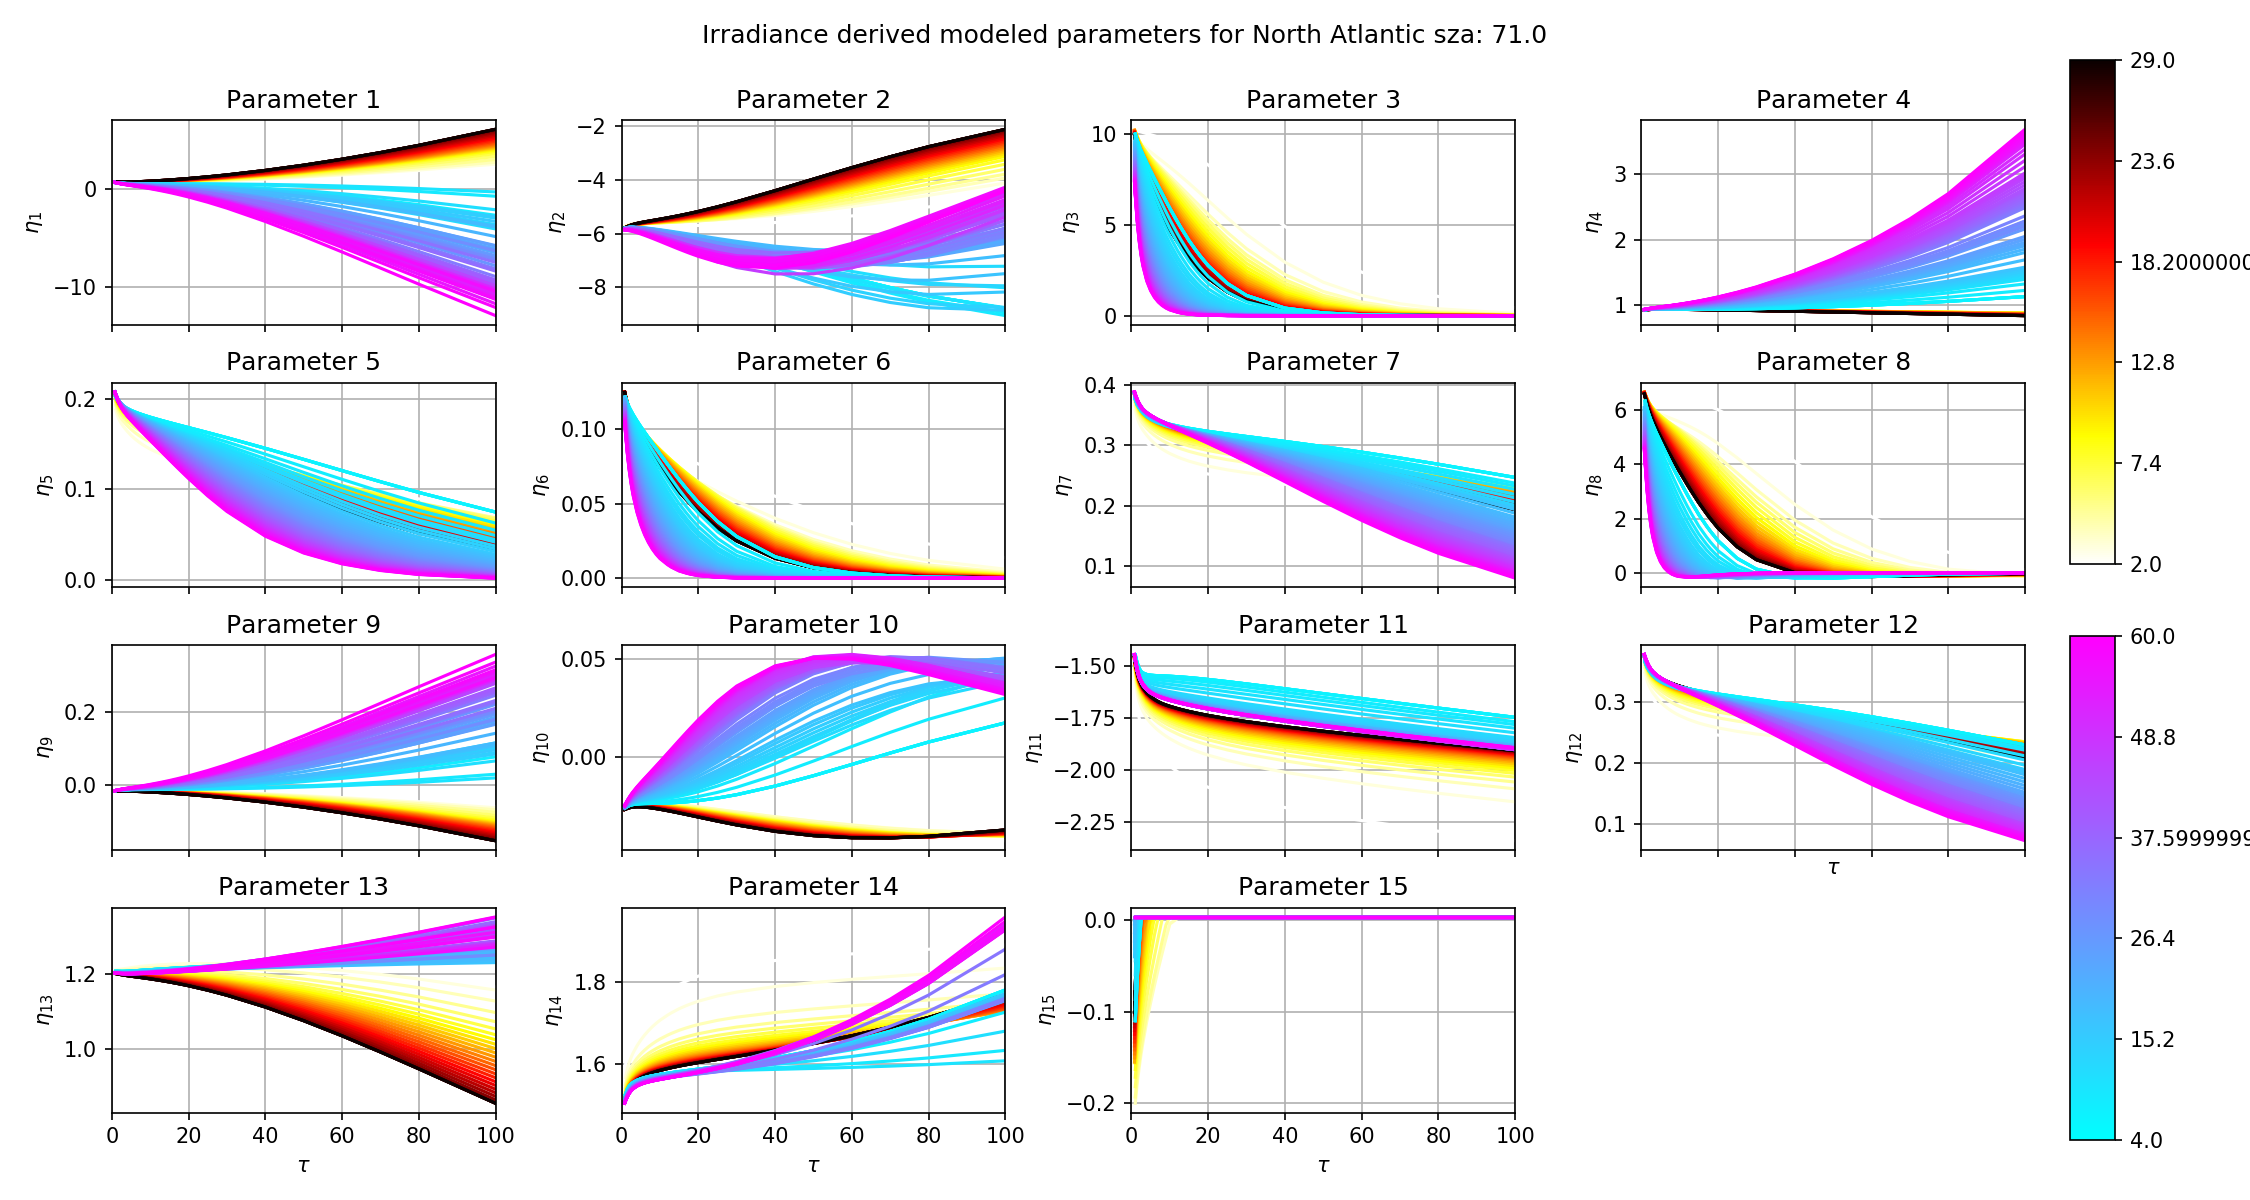

In [93]:
figl,axl = Sp.plot_lut_vs_tau(lutn[10],forceliq=False,forceice=False)
plt.suptitle('Irradiance derived modeled parameters for North Atlantic sza: {}'.format(lutb['sza'][10]))
plt.savefig(fp+'model/NAAMES_irr_lut_sza71.png',dpi=600,transparent=True)